In [7]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [8]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [9]:
df_da_us = df_da_us.explode('job_skills')

In [13]:
df_da_us_grouped = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_da_top_pay = df_da_us_grouped.sort_values(by='median', ascending= False).head(10)
df_da_top_skills = df_da_us_grouped.sort_values(by= 'count', ascending= False).head(10).sort_values(by='median', ascending= False)

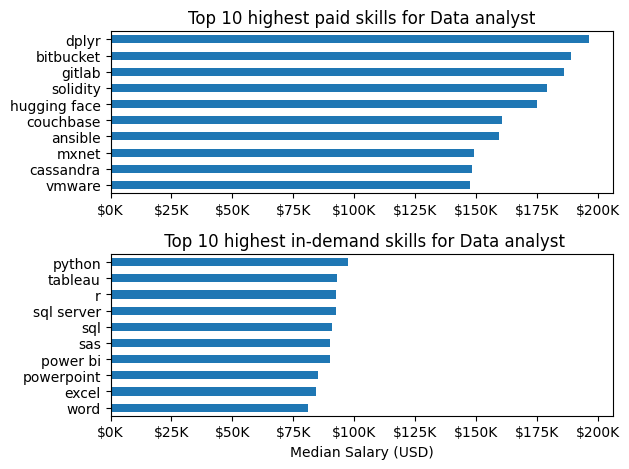

In [20]:
fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind = 'barh', y='median', ax= ax[0], legend=False)
ax[0].set_title('Top 10 highest paid skills for Data analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

df_da_top_skills[::-1].plot(kind = 'barh', y='median', ax= ax[1], legend= False)
ax[1].set_title(' Top 10 highest in-demand skills for Data analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()